# Parameter fit

In [1]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from prep_data import \
    mazes,\
    model_preds,\
    get_exp1_at,\
    get_exp2_at,\
    get_exp3_at__exp3_mt,\
    get_exp4a_ht,\
    get_exp4b_ht
from analysisutils import short_predictor_names
import analysisutils

from vgc_project.parameter_fit import create_fit_vgc_model_to_trials, Trial

joblib_cache_location = "./_analysiscache"
fit_vgc_model_to_trials = create_fit_vgc_model_to_trials(joblib_cache_location=joblib_cache_location)

In [2]:
parameters_to_fit=[
    'construal_inverse_temp',
    'construal_rand_choose',
]

In [3]:
exp1_at = get_exp1_at()
exp1_mean_at = exp1_at.groupby(['grid', 'obstacle'])['attention_N'].mean().reset_index()
exp1_mean_at['logodd_attention_N'] = np.log(exp1_mean_at['attention_N']/(1 - exp1_mean_at['attention_N']))
exp1_mean_at['logodd_attention_N'] = exp1_mean_at['logodd_attention_N'] - exp1_mean_at['logodd_attention_N'].mean() 

exp1_at_fit_res = analysisutils.fit_vgc_model_to_experiment_data(
    exp_df=exp1_mean_at,
    mazes=mazes,
    response_type='real',
    response_col='logodd_attention_N',
    parameters_to_fit=parameters_to_fit,
    fit_vgc_model_to_trials=fit_vgc_model_to_trials
)

Loading Experiment 1 Attention Trials


In [4]:
exp2_at = get_exp2_at()
exp2_mean_at = exp2_at.groupby(['grid', 'obstacle'])['attention_N'].mean().reset_index()
exp2_mean_at['logodd_attention_N'] = np.log(exp2_mean_at['attention_N']/(1 - exp2_mean_at['attention_N']))
exp2_mean_at['logodd_attention_N'] = exp2_mean_at['logodd_attention_N'] - exp2_mean_at['logodd_attention_N'].mean() 

exp2_at_fit_res = analysisutils.fit_vgc_model_to_experiment_data(
    exp_df=exp2_mean_at,
    mazes=mazes,
    response_type='real',
    response_col='logodd_attention_N',
    parameters_to_fit=parameters_to_fit,
    fit_vgc_model_to_trials=fit_vgc_model_to_trials
)


In [5]:
# Note: converting bounded, normalized scores to log-odds space, and then centering
exp3_at, exp3_mt = get_exp3_at__exp3_mt()
exp3_mean_at = exp3_at.groupby(['grid', 'obstacle'])['attention_N'].mean().reset_index()
exp3_mean_mt = exp3_mt.groupby(['grid', 'obstacle'])[['correct', 'conf_N']].mean().reset_index()

exp3_mean_at['logodd_attention_N'] = np.log(exp3_mean_at['attention_N']/(1 - exp3_mean_at['attention_N']))
exp3_mean_at['logodd_attention_N'] = exp3_mean_at['logodd_attention_N'] - exp3_mean_at['logodd_attention_N'].mean() 
exp3_mean_mt['logodd_correct'] = np.log(exp3_mean_mt['correct']/(1 - exp3_mean_mt['correct']))
exp3_mean_mt['logodd_correct'] = exp3_mean_mt['logodd_correct'] - exp3_mean_mt['logodd_correct'].mean()
exp3_mean_mt['logodd_conf_N'] = np.log(exp3_mean_mt['conf_N']/(1 - exp3_mean_mt['conf_N']))
exp3_mean_mt['logodd_conf_N'] = exp3_mean_mt['logodd_conf_N'] - exp3_mean_mt['logodd_conf_N'].mean()

exp3_at_fit_res = analysisutils.fit_vgc_model_to_experiment_data(
    exp_df=exp3_mean_at,
    mazes=mazes,
    response_type='real',
    response_col='logodd_attention_N',
    parameters_to_fit=parameters_to_fit,
    fit_vgc_model_to_trials=fit_vgc_model_to_trials
)

exp3_correct_fit_res = analysisutils.fit_vgc_model_to_experiment_data(
    exp_df=exp3_mean_mt,
    mazes=mazes,
    response_type='real',
    response_col='logodd_correct',
    parameters_to_fit=parameters_to_fit,
    fit_vgc_model_to_trials=fit_vgc_model_to_trials
)

exp3_conf_fit_res = analysisutils.fit_vgc_model_to_experiment_data(
    exp_df=exp3_mean_mt,
    mazes=mazes,
    response_type='real',
    response_col='logodd_conf_N',
    parameters_to_fit=parameters_to_fit,
    fit_vgc_model_to_trials=fit_vgc_model_to_trials
)

In [6]:
exp4a_ht = get_exp4a_ht()
exp4a_mean_ht = exp4a_ht.groupby(['grid', 'obstacle'])[['log_hoverduration', 'hovered']].mean().reset_index()
exp4a_mean_ht['logodd_hovered'] = np.log(exp4a_mean_ht['hovered']/(1 - exp4a_mean_ht['hovered']))
exp4a_mean_ht['logodd_hovered'] = exp4a_mean_ht['logodd_hovered'] - exp4a_mean_ht['logodd_hovered'].mean() 
exp4a_mean_ht['log_hoverduration_C'] = exp4a_mean_ht['log_hoverduration'] - exp4a_mean_ht['log_hoverduration'].mean() 

exp4a_ht_hov_fit_res = analysisutils.fit_vgc_model_to_experiment_data(
    exp_df=exp4a_mean_ht,
    mazes=mazes,
    response_type='real',
    response_col='logodd_hovered',
    parameters_to_fit=parameters_to_fit,
    fit_vgc_model_to_trials=fit_vgc_model_to_trials
)

exp4a_ht_dur_fit_res = analysisutils.fit_vgc_model_to_experiment_data(
    exp_df=exp4a_mean_ht,
    mazes=mazes,
    response_type='real',
    response_col='log_hoverduration_C',
    parameters_to_fit=parameters_to_fit,
    fit_vgc_model_to_trials=fit_vgc_model_to_trials,
    seed=12487,
)

In [7]:
# Note: converting bounded, normalized scores to log-odds space, and then centering
exp4b_ht = get_exp4b_ht()
exp4b_mean_ht = exp4b_ht.groupby(['grid', 'obstacle'])[['log_hoverduration', 'hovered']].mean().reset_index()
exp4b_mean_ht['logodd_hovered'] = np.log(exp4b_mean_ht['hovered']/(1 - exp4b_mean_ht['hovered']))
exp4b_mean_ht['logodd_hovered'] = exp4b_mean_ht['logodd_hovered'] - exp4b_mean_ht['logodd_hovered'].mean() 
exp4b_mean_ht['log_hoverduration_C'] = exp4b_mean_ht['log_hoverduration'] - exp4b_mean_ht['log_hoverduration'].mean() 

exp4b_ht_hov_fit_res = analysisutils.fit_vgc_model_to_experiment_data(
    exp_df=exp4b_mean_ht,
    mazes=mazes,
    response_type='real',
    response_col='logodd_hovered',
    parameters_to_fit=parameters_to_fit,
    fit_vgc_model_to_trials=fit_vgc_model_to_trials,
)

exp4b_ht_dur_fit_res = analysisutils.fit_vgc_model_to_experiment_data(
    exp_df=exp4b_mean_ht,
    mazes=mazes,
    response_type='real',
    response_col='log_hoverduration_C',
    parameters_to_fit=parameters_to_fit,
    fit_vgc_model_to_trials=fit_vgc_model_to_trials,
)

In [8]:
all_fit_res = [
    dict(exp="Initial Exp.", dv="Awareness", fit_res=exp1_at_fit_res, response_col="logodd_attention_N"),
    dict(exp="Up-front Planning", dv="Awareness", fit_res=exp2_at_fit_res, response_col="logodd_attention_N"),
    dict(exp="Critical Mazes", dv="Accuracy", fit_res=exp3_correct_fit_res, response_col="logodd_correct"),
    dict(exp="Critical Mazes", dv="Confidence", fit_res=exp3_conf_fit_res, response_col="logodd_conf_N"),
    dict(exp="Critical Mazes", dv="Awareness", fit_res=exp3_at_fit_res, response_col="logodd_attention_N"),
    dict(exp="Process-tracing (Initial Mazes)", dv="Hovering", fit_res=exp4a_ht_hov_fit_res, response_col="logodd_hovered"),
    dict(exp="Process-tracing (Initial Mazes)", dv="Duration", fit_res=exp4a_ht_dur_fit_res, response_col="log_hoverduration_C"),
    dict(exp="Process-tracing (Critical Mazes)", dv="Hovering", fit_res=exp4b_ht_hov_fit_res, response_col="logodd_hovered"),
    dict(exp="Process-tracing (Critical Mazes)", dv="Duration", fit_res=exp4b_ht_dur_fit_res, response_col="log_hoverduration_C"),
]

In [9]:
results_df = []
for res_i, ele in enumerate(all_fit_res):
    fit_res = ele['fit_res']
    row = {**fit_res.fit_result['fitted_parameters'], **fit_res.summary.__dict__}
    row['construal_temp'] = 1/row['construal_inverse_temp']
    del row['construal_inverse_temp']
    # row['dv'] = ele['name'].\
    #     replace("\n(log-odds)", "").\
    #     replace("Normalized", "").\
    #     replace("Log", "").\
    #     replace("g\n(Initial", "g (Initial").\
    #     replace("g\n(Critical", "g (Critical").\
    #     split("\n")
    # row['dv'] = tuple(row['dv'])
    row['exp'] = ele['exp']
    row['dv'] = ele['dv']
    results_df.append(row)
results_df = pd.DataFrame(results_df)
results_df = results_df.set_index(['exp', 'dv'])
results_df.index.names = [None, None]
results_df = results_df[['construal_temp', 'construal_rand_choose', 'r2', 'mse']]
results_df = results_df.rename(columns={"construal_rand_choose": "$\epsilon$", "r2": "$R^2$", "mse": "MSE", "construal_temp": r"$\alpha$"})
results_table = results_df.to_latex(
    float_format="{:0.2f}".format,
    column_format="llcccc",
    escape=False,
)
caption = "\\caption{Fitted value-guided construal parameter results}"
label = r"\label{table:fit_params}"
results_table = results_table.replace(r"\end{tabular}", r"\end{tabular}"+"\n"+caption +"\n"+label)
with open("./inputs/fitted_vgc_table.tex", "w") as file:
    file.write(results_table)
results_df.round(2)

$\alpha$  $\epsilon$  $R^2$   MSE
Initial Exp.                     Awareness       0.35        0.68   0.43  0.49
Up-front Planning                Awareness       0.31        0.75   0.32  0.49
Critical Mazes                   Accuracy        0.03        0.68   0.55  0.35
                                 Confidence      0.03        0.78   0.50  0.19
                                 Awareness       0.03        0.64   0.53  0.51
Process-tracing (Initial Mazes)  Hovering        0.39        0.58   0.43  0.83
                                 Duration        0.33        0.87   0.23  0.18
Process-tracing (Critical Mazes) Hovering        0.03        0.62   0.51  0.62
                                 Duration        0.03        0.80   0.46  0.19

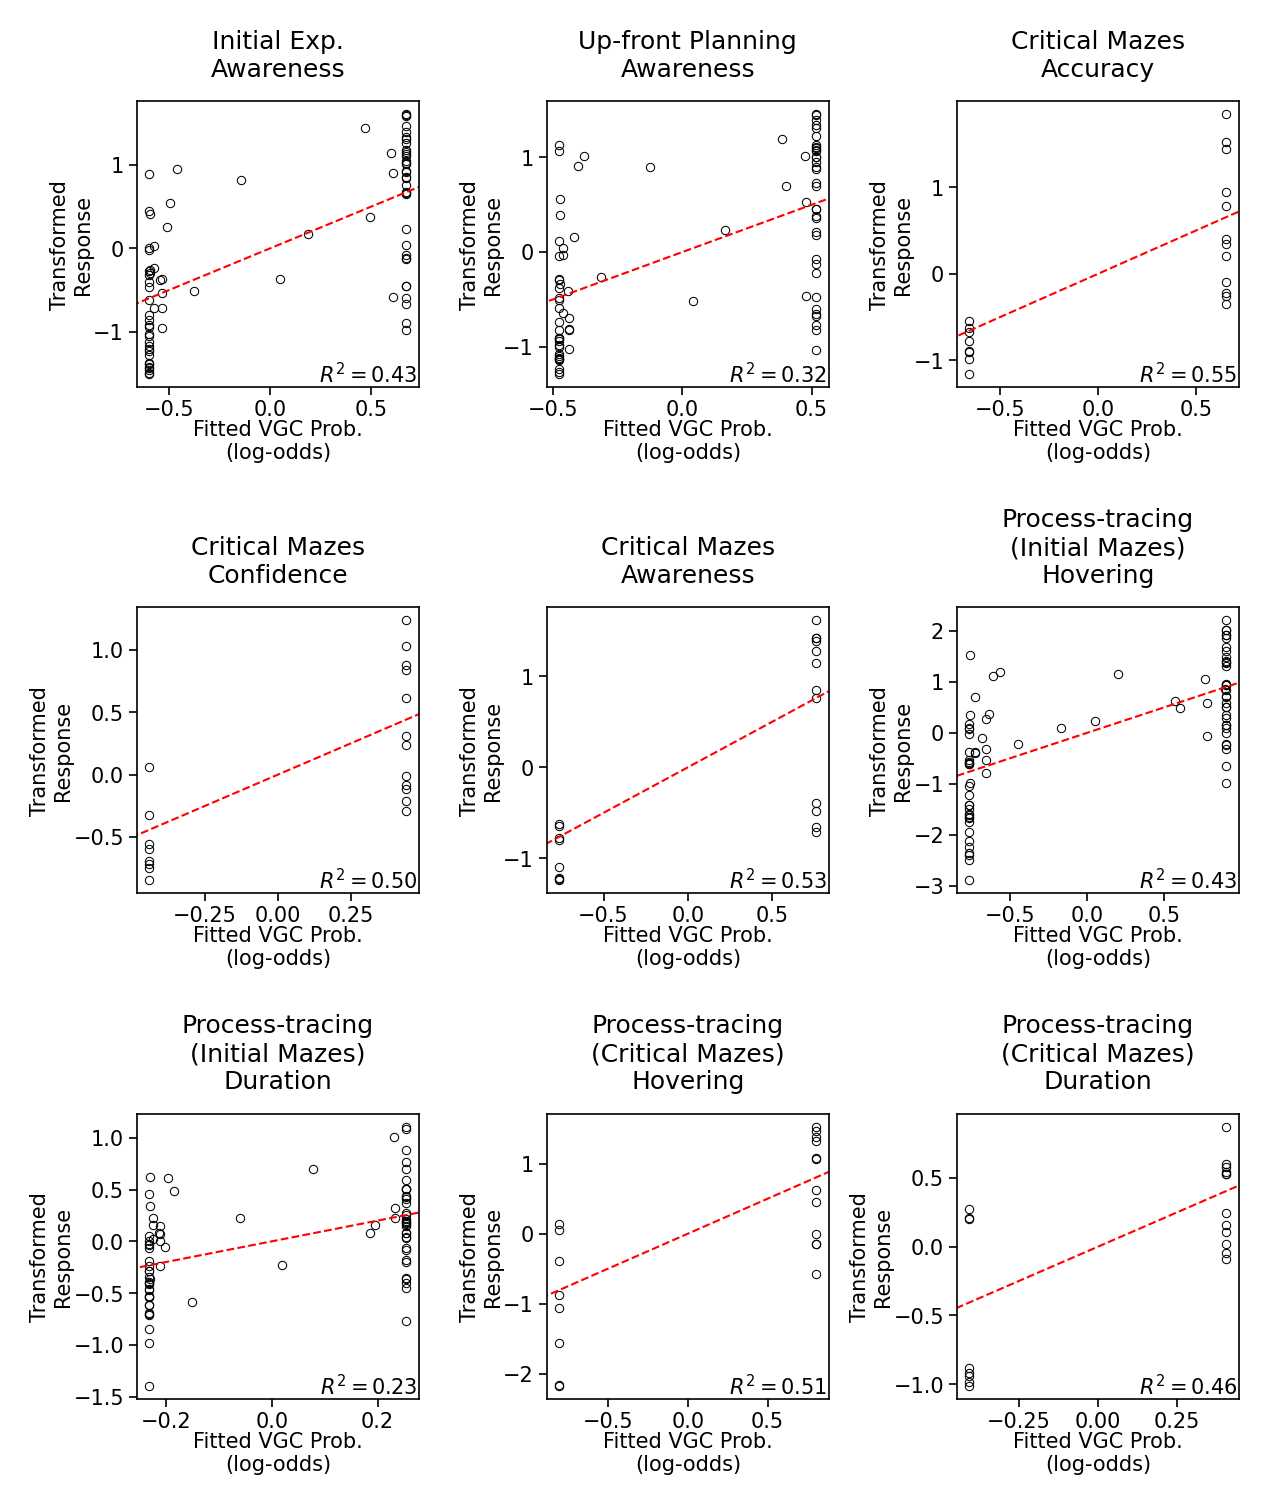

In [10]:
# create figure
fig_width_mm = 110
fig_height_mm = 130
mm_to_inch = 1/25.4 

assert fig_width_mm <= 182
assert fig_height_mm <= 245

import matplotlib.gridspec as gridspec
fig, axes = plt.subplots(
    ncols=3, nrows=3,
    figsize=(fig_width_mm*mm_to_inch, fig_height_mm*mm_to_inch),
    dpi=300,
    # constrained_layout=True
)
axes = axes.flatten()
    
for res_i, ele in enumerate(all_fit_res):
    ax = axes[res_i]
    response_col = ele["response_col"]
    y = ele['fit_res'].result_df[response_col]
    x = ele['fit_res'].result_df[f"logodd_vgc_{response_col}_fitted_prob"]
    ax.plot(
        x, y,
        linestyle='',
        marker="o",
        markerfacecolor="none",
        markersize=2,
        markeredgewidth=.25,
        markeredgecolor="black",
        # alpha=.3,
        rasterized=False
    )
    for spine in ['top','bottom','left','right']:
        ax.spines[spine].set_linewidth(.4)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 5, width=.4, length=2, pad=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.plot([-2, 2], [-2, 2], 'r--', linewidth=.5)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax_xlabel = ax.set_xlabel("Fitted VGC Prob.\n(log-odds)", labelpad=.05)
    ax_xlabel.set_fontsize(5)
    
    ax_ylabel = ax.set_ylabel("Transformed\nResponse", labelpad=.05)
    ax_ylabel.set_fontsize(5)
    
    ax.set_title(ele['exp'].replace(" (", "\n(") + "\n" + ele['dv']).set_fontsize(6)
    
    summary = ele['fit_res'].summary
    summary = f"$R^2 = {summary.r2:.2f}$ "
    summary_artist = ax.text(
        ax.get_xlim()[1],
        ax.get_ylim()[0],
        summary,
        ha="right",
        va="bottom",
    )
    summary_artist.set_fontproperties("Arial")
    summary_artist.set_fontsize(5)
fig.tight_layout(w_pad=.5)
fig.savefig("./inputs/fitted_vgc_plot.eps", dpi=600)